In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = "/content/drive/My Drive/NeuroSpeechBert_Dataset"
os.listdir(dataset_path)

['Demographics_age_sex (1).xlsx',
 'PD_AH',
 'HC_AH',
 'extracted_features.csv',
 'best_mel_model.h5',
 'mel_model.h5',
 'mel_model_cm.png',
 'mel_model_history.png',
 'spectrograms',
 'extracted_features(2).csv',
 'selected_features.csv']

In [ ]:
import pandas as pd

# Load metadata file
metadata_file = os.path.join(dataset_path, "Demographics_age_sex (1).xlsx")
df = pd.read_excel(metadata_file)

print(df.head())


                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


In [ ]:
df['Sample ID'] = df['Sample ID'].astype(str) + ".wav"

In [ ]:
hc_folder = os.path.join(dataset_path, "HC_AH/HC_AH")
pd_folder = os.path.join(dataset_path, "PD_AH")

hc_files = os.listdir(hc_folder) if os.path.exists(hc_folder) else []
pd_files = os.listdir(pd_folder) if os.path.exists(pd_folder) else []
all_files = set(hc_files).union(set(pd_files))

In [ ]:
print(hc_files[:10])
print(pd_files[:10])

['AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav', 'AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav', 'AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav', 'AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav', 'AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav', 'AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav', 'AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav', 'AH_456K_CBF60DD0-82AA-430E-A5E9-E1D3AE175CCB.wav', 'AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB.wav', 'AH_197T_7552379A-2310-46E1-9466-9D8045C990B8.wav']
['AH_545753014-C68926CC-AB91-49AF-90A6-BB5C434283DB.wav', 'AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.wav', 'AH_545713224-1B3708B0-8792-4FEE-B03B-C7CB9CB03D58.wav', 'AH_545648867-CB17D873-1CEA-492A-B5B0-93C7463F516C.wav', 'AH_545692315-C2972597-9AEC-4060-A186-F1F59340640C.wav', 'AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav', 'AH_545713222-DA13DC3A-F24B-454E-984F-19DF19328D39.wav', 'AH_545743929-E2EAE1A3-7E46-4DCF-8DB7-37A5CA47DB9D.wav', 'AH_545643618-82A143AC

In [ ]:
missing_in_files = set(df['Sample ID']) - all_files
missing_in_metadata = all_files - set(df['Sample ID'])

print(f"Samples in metadata but missing in files: {len(missing_in_files)}")
print(f"Samples in files but missing in metadata: {len(missing_in_metadata)}")

Samples in metadata but missing in files: 0
Samples in files but missing in metadata: 0


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
import numpy as np


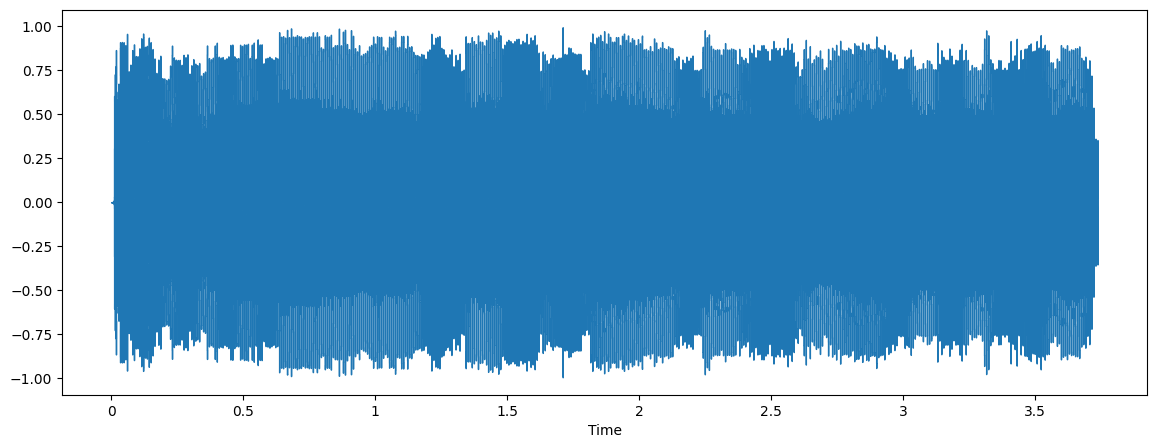

In [ ]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate #LIBROSA ALWAYS GIVES 22050

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate  #original smaple rate

16000

In [ ]:
def preprocess_audio(file_path, target_sr=16000):
    """Loads, normalizes, and trims silent parts from an audio file."""
    y, sr = librosa.load(file_path, sr=target_sr, mono=True)  # Load with target sample rate
    y = y / np.max(np.abs(y))  # Normalize amplitude
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)  # Trim silence

    return y, y_trimmed, sr  # Return both original and trimmed versions


In [ ]:
import numpy as np
sample_file = os.path.join(hc_folder, "AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav")
y, y_trimmed, sr = preprocess_audio(sample_file)

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

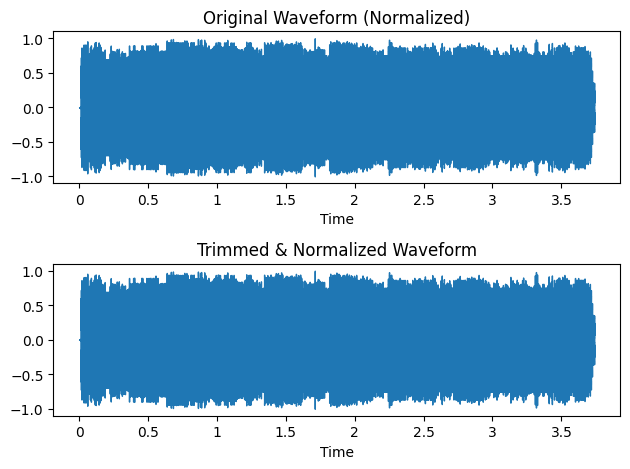

In [ ]:
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Original Waveform (Normalized)")

# Trimmed waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_trimmed, sr=sr)
plt.title("Trimmed & Normalized Waveform")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
!pip install soundfile
import soundfile as sf
from tqdm import tqdm

In [ ]:
wave_audio

array([   15,    17,    13, ..., -7961, -8779, -4841], dtype=int16)

PREPROCESSING OF METADATA FILE

In [ ]:
# Define metadata file path
metadata_file = os.path.join(dataset_path, "Demographics_age_sex (1).xlsx")
df = pd.read_excel(metadata_file)

# Display the first few rows
print(df.head())

                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


In [ ]:
# Check for missing values
print(df.isnull().sum())


Sample ID    0
Label        0
Age          0
Sex          0
dtype: int64


In [ ]:
import os

# Define the folder paths (change these to your actual paths)
hc_folder = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH"
pd_folder = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/PD_AH"

# List all files in both folders
hc_files = set(os.listdir(hc_folder))
pd_files = set(os.listdir(pd_folder))

# Merge both sets
all_files = hc_files.union(pd_files)

print("Total files in dataset:", len(all_files))
print("First 10 files:", list(all_files)[:10])


Total files in dataset: 81
First 10 files: ['AH_501F_4BDDBB93-EA99-4B1C-AD7F-4D874F39FB0C.wav', 'AH_545789671-794D2256-DDFF-4009-8BA8-8A306C8FA14F.wav', 'AH_333L_6C551A6E-CC47-410E-AA49-2DC0A86E6489.wav', 'AH_545789680-7FF9D4F1-DDCC-4CB6-8668-76530D670FA5.wav', 'AH_545743929-E2EAE1A3-7E46-4DCF-8DB7-37A5CA47DB9D.wav', 'AH_621N_204CF3E2-1DA0-4908-A47F-78997B1BAFC2.wav', 'AH_569E_B26CCA1E-29AD-48DD-9947-48DB8A56CA31.wav', 'AH_789Y_20CB672C-5F66-425E-8707-BE5B7FF807E2.wav', 'AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav', 'AH_545789674-53885025-35F1-48C1-9826-BAAEB8BEAF58.wav']


In [ ]:
import pandas as pd

# Load metadata
metadata_file = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/Demographics_age_sex (1).xlsx"
df = pd.read_excel(metadata_file)

# Ensure filenames match correctly (Appending .wav to match real file names)
metadata_files = set(df['Sample ID'].astype(str) + ".wav")

# Find missing files
missing_in_files = metadata_files - all_files
missing_in_metadata = all_files - metadata_files

print(f"Samples in metadata but missing in files: {len(missing_in_files)}")
print(f"Samples in files but missing in metadata: {len(missing_in_metadata)}")

# Show some examples
print("Examples missing in files:", list(missing_in_files)[:5])
print("Examples missing in metadata:", list(missing_in_metadata)[:5])

Samples in metadata but missing in files: 0
Samples in files but missing in metadata: 0
Examples missing in files: []
Examples missing in metadata: []


PREPROCESSING AUDIO FILES

Sampling Rate: 16000 Hz
Audio Duration: 3.74 seconds


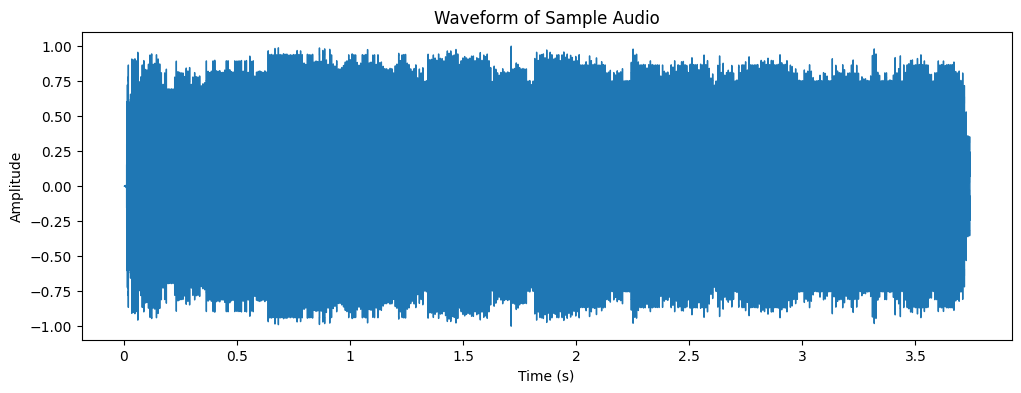

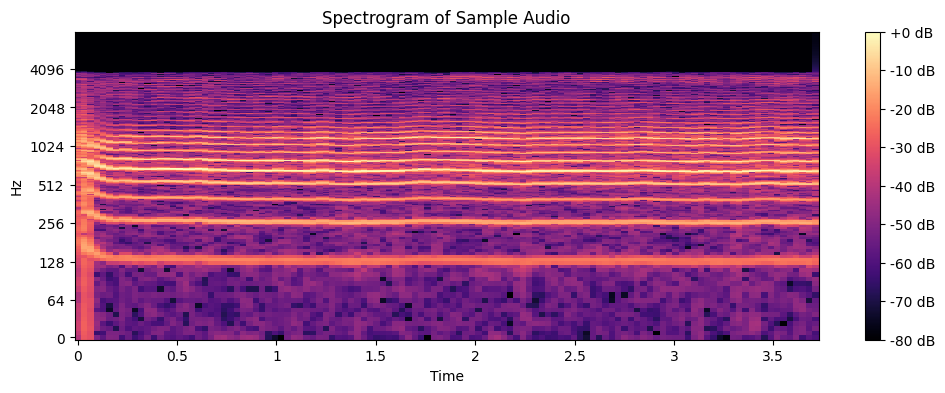

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset path
dataset_path = "/content/drive/My Drive/NeuroSpeechBert_Dataset"

# Pick a sample file (Update with an actual filename from your dataset)
sample_file = os.path.join(dataset_path, "HC_AH", "HC_AH", "AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav")


# Load audio
y, sr = librosa.load(sample_file, sr=None)  # Load with original sampling rate

# Print basic info
print(f"Sampling Rate: {sr} Hz")
print(f"Audio Duration: {len(y)/sr:.2f} seconds")

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot spectrogram
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Sample Audio")
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=22050)  # Load audio
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)  # linear mel spectrogram
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)     # this makes it log-mel


    plt.figure(figsize=(5, 5))
    librosa.display.specshow(mel_spectrogram_db, sr=sr)
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

HC_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH"
PD_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/PD_AH"
SPECTROGRAM_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/spectrograms"

HC_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "HC")
PD_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "PD")

os.makedirs(HC_SPECTROGRAM_PATH, exist_ok=True)
os.makedirs(PD_SPECTROGRAM_PATH, exist_ok=True)

# Process Healthy Control (HC_AH) files
for filename in os.listdir(HC_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(HC_PATH, filename),
                         os.path.join(HC_SPECTROGRAM_PATH, output_filename))

# Process Parkinson’s Disease (PD_AH) files
for filename in os.listdir(PD_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(PD_PATH, filename),
                         os.path.join(PD_SPECTROGRAM_PATH, output_filename))

print("Spectrograms saved successfully!")

Spectrograms saved successfully!


BASIC AUDIO PROCESSING

In [ ]:
for folder in [hc_folder, pd_folder]:
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder, filename)
            y_processed, sr = preprocess_audio(file_path)

            sf.write(file_path, y_processed, sr)

print("✅ All files preprocessed and saved in the same folder structure.")

✅ All files preprocessed and saved in the same folder structure.


FEATURE EXTRACTION

In [ ]:
!pip install opensmile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.0/996.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 20.4 MB/s eta 0:00:00


In [ ]:
import opensmile
from tqdm import tqdm
import subprocess

In [ ]:
!pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.6 MB/s eta 0:00:00


In [ ]:
import parselmouth

def extract_parselmouth_features(file_path):
    try:
        snd = parselmouth.Sound(file_path)
        pitch = snd.to_pitch()
        mean_pitch = pitch.selected_array['frequency'].mean()

        return {"mean_pitch_parselmouth": mean_pitch}
    except Exception as e:
        print(f"Parselmouth error for {file_path}: {e}")
        return {"mean_pitch_parselmouth": None}

In [ ]:
OUTPUT_CSV = os.path.join(dataset_path, "extracted_features.csv")

# Initialize OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPS,
    feature_level=opensmile.FeatureLevel.Functionals,
)

/usr/local/lib/python3.11/dist-packages/opensmile/core/smile.py:252: UserWarning: Feature set 'FeatureSet.GeMAPS' is deprecated, consider switching to 'FeatureSet.GeMAPSv01b'.
  warnings.warn(


In [ ]:
def get_sample_id(filename):
    try:
        filename = filename.replace(".wav", "")
        parts = filename.split("_")
        if len(parts) >= 2:
            return "_".join(parts[1:])  # Keep everything after "AH_"
        return filename
    except Exception as e:
        print(f"Error extracting sample ID from {filename}: {e}")
        return None

data = []
def extract_opensmile_features(file_path):
    try:
        features = smile.process_file(file_path)
        return features.to_dict(orient="records")[0]
    except Exception as e:
        print(f"OpenSMILE error for {file_path}: {e}")
        return {}


def extract_librosa_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y_trimmed, _ = librosa.effects.trim(y)

    # Extract MFCCs (Mean of 13 Coefficients)
    mfccs = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y_trimmed, sr=sr))

    # Pitch
    pitches, magnitudes = librosa.piptrack(y=y_trimmed, sr=sr)
    pitch_values = pitches[pitches > 0]
    pitch_mean = np.mean(pitch_values) if len(pitch_values) > 0 else 0

    return {
        "mfcc_1": mfccs_mean[0], "mfcc_2": mfccs_mean[1], "mfcc_3": mfccs_mean[2],
        "mfcc_4": mfccs_mean[3], "mfcc_5": mfccs_mean[4], "mfcc_6": mfccs_mean[5],
        "spectral_centroid": spectral_centroid,
        "pitch": pitch_mean
    }


def extract_all_features(file_path):
    try:
        sample_id = get_sample_id(os.path.basename(file_path))
        smile_features = extract_opensmile_features(file_path)
        librosa_features = extract_librosa_features(file_path)
        parselmouth_features = extract_parselmouth_features(file_path)
        return {"sample_id": sample_id, **smile_features, **librosa_features, **parselmouth_features}
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

data = []

# Process Parkinson’s Disease (PD) files
print("Processing PD_AH files...")
for file in tqdm(os.listdir(pd_folder)):
    file_path = os.path.join(pd_folder, file)
    if file.endswith(".wav"):
        features = extract_all_features(file_path)
        if features:
            features["label"] = "PD"
            data.append(features)

# Process Healthy Control (HC) files
print("Processing HC_AH files...")
for file in tqdm(os.listdir(hc_folder)):
    file_path = os.path.join(hc_folder, file)
    if file.endswith(".wav"):
        features = extract_all_features(file_path)
        if features:
            features["label"] = "HC"
            data.append(features)

# Convert extracted data to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/extracted_features(2).csv"
df.to_csv(csv_path, index=False)

print(f"✅ Feature extraction complete! CSV saved at: {csv_path}")
print(df.columns.tolist())

Processing PD_AH files...


100%|██████████| 40/40 [00:15<00:00,  2.56it/s]


Processing HC_AH files...


100%|██████████| 41/41 [00:16<00:00,  2.42it/s]


✅ Feature extraction complete! CSV saved at: /content/drive/MyDrive/NeuroSpeechBert_Dataset/extracted_features(2).csv
['sample_id', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'jitterLocal_sma3nz_amean', 'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean', 'shimm

In [ ]:
selected_features = [
    "sample_id",
    # Acoustic Features (Voice Quality & Harmonic Structure)
    "jitterLocal_sma3nz_amean", "jitterLocal_sma3nz_stddevNorm",
    "shimmerLocaldB_sma3nz_amean", "shimmerLocaldB_sma3nz_stddevNorm",
    "HNRdBACF_sma3nz_amean", "HNRdBACF_sma3nz_stddevNorm",

    # Prosodic Features (Pitch, Intensity, Duration,Speaking Rate)
    "F0semitoneFrom27.5Hz_sma3nz_amean", "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_percentile20.0", "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_percentile80.0", "loudness_sma3_amean",
    "loudness_sma3_stddevNorm", "VoicedSegmentsPerSec",
    "MeanVoicedSegmentLengthSec", "StddevVoicedSegmentLengthSec",

    # Spectral Features (Speech Clarity)
    "spectral_centroid", "mfcc_1", "mfcc_2", "mfcc_3", "mfcc_4", "mfcc_5", "mfcc_6",

    # Target Label (if available)
    "label"
]

existing_features = [feature for feature in selected_features if feature in df.columns]
filtered_df = df[existing_features]  # Include label for supervised learning

# Save the reduced dataset
output_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv"
filtered_df.to_csv(output_path, index=False)

print(f"✅ Feature selection complete! CSV saved at: {output_path}")
print(f"Selected Features: {len(existing_features)}")

✅ Feature selection complete! CSV saved at: /content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv
Selected Features: 25


EfficientNet

In [ ]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

RESNET 50 ON LOG-MEL SPECTOGRAMS

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.optim as optim

In [ ]:


data_dir = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/spectrograms"
num_classes = 2
batch_size = 32
num_epochs = 10
learning_rate = 0.001

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Grayscale image mean/std
])

In [ ]:
dataset = ImageFolder(root=data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = models.resnet50(pretrained=True)

# Replace final FC layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {acc:.2f}%")

# ===============================
# 7. Evaluation on Test Set
# ===============================
model.eval()
correct = 0
total = 0

Epoch [1/10], Loss: 0.7986, Accuracy: 54.69%
Epoch [2/10], Loss: 1.1474, Accuracy: 59.38%
Epoch [3/10], Loss: 0.8726, Accuracy: 60.94%
Epoch [4/10], Loss: 0.7019, Accuracy: 71.88%
Epoch [5/10], Loss: 0.6793, Accuracy: 76.56%
Epoch [6/10], Loss: 0.5764, Accuracy: 64.06%
Epoch [7/10], Loss: 0.4053, Accuracy: 82.81%
Epoch [8/10], Loss: 0.4013, Accuracy: 79.69%
Epoch [9/10], Loss: 0.2736, Accuracy: 89.06%
Epoch [10/10], Loss: 0.2665, Accuracy: 90.62%


In [ ]:
def evaluate_model(model, loader, dataset_name="Test"):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for class 1
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    acc = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"\n{dataset_name} Accuracy: {acc:.2f}%")
    print(f"{dataset_name} Classification Report:\n", classification_report(all_labels, all_preds, target_names=["Healthy", "Parkinson's"]))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
    plt.title(f'{dataset_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)
    print(f"{dataset_name} AUC-ROC Score: {roc_auc:.4f}")

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'{dataset_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Train Accuracy: 79.69%
Train Classification Report:
               precision    recall  f1-score   support

     Healthy       0.74      0.91      0.82        32
 Parkinson's       0.88      0.69      0.77        32

    accuracy                           0.80        64
   macro avg       0.81      0.80      0.79        64
weighted avg       0.81      0.80      0.79        64



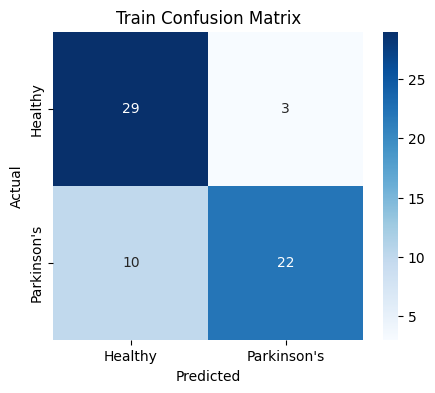

Train AUC-ROC Score: 0.9121


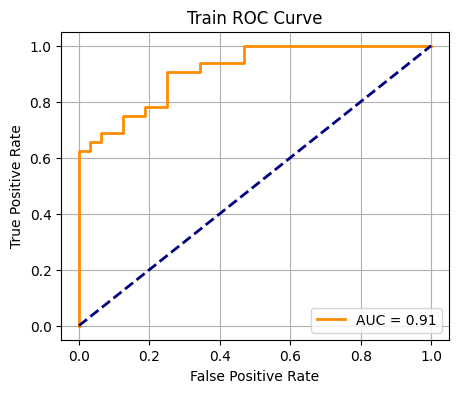


Test Accuracy: 76.47%
Test Classification Report:
               precision    recall  f1-score   support

     Healthy       0.78      0.78      0.78         9
 Parkinson's       0.75      0.75      0.75         8

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



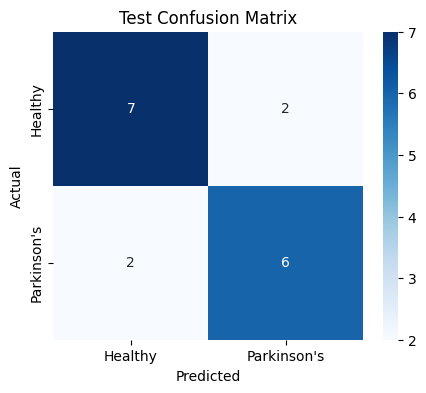

Test AUC-ROC Score: 0.7778


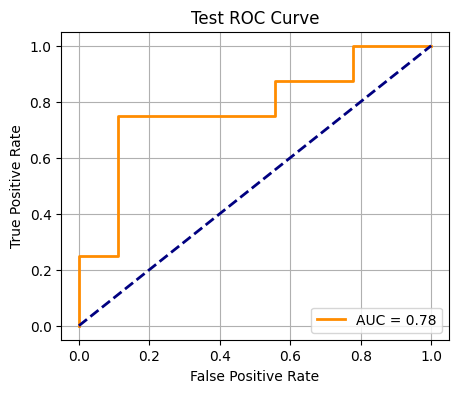

In [ ]:
# Training Evaluation
evaluate_model(model, train_loader, dataset_name="Train")

# Testing Evaluation
evaluate_model(model, test_loader, dataset_name="Test")


EffNet using log-Mel spectrograms

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torch.utils.data import WeightedRandomSampler, DataLoader
# Path where spectrogram images are saved
data_dir = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/spectrograms"

# Define transformations with augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit EfficientNet input
    transforms.RandomHorizontalFlip(),  # Augment by flipping
    transforms.RandomRotation(10),  # Random rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

dataset = ImageFolder(root=data_dir, transform=transform)

# Split into train & test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
labels = np.array([label for _, label in train_loader.dataset])

#
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pretrained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Modify the classifier for your dataset
num_classes = 2  # Change based on your dataset (e.g., Parkinson's vs Healthy)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from torch import nn

# Compute class weights (inverse of class frequency)
class_weights = torch.tensor([1.0, 12/5]).to(device)  # More weight for Parkinson's

# Update loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

print("Training complete!")

Epoch [1/10], Loss: 0.6118, Train Acc: 64.06%
Epoch [2/10], Loss: 0.4026, Train Acc: 73.44%
Epoch [3/10], Loss: 0.2466, Train Acc: 85.94%
Epoch [4/10], Loss: 0.1561, Train Acc: 93.75%
Epoch [5/10], Loss: 0.1168, Train Acc: 92.19%
Epoch [6/10], Loss: 0.0601, Train Acc: 100.00%
Epoch [7/10], Loss: 0.0847, Train Acc: 95.31%
Epoch [8/10], Loss: 0.0568, Train Acc: 96.88%
Epoch [9/10], Loss: 0.0213, Train Acc: 100.00%
Epoch [10/10], Loss: 0.0080, Train Acc: 100.00%
Training complete!


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

def evaluate_model_full(model, data_loader, device, dataset_name="Test", plot_roc=True, plot_cm=True):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Class 1: Parkinson's
            preds = torch.argmax(outputs, dim=1)

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    y_true = np.array(all_labels)
    y_pred = np.array(all_preds)
    y_prob = np.array(all_probs)

    # 🔹 Accuracy & AUC
    accuracy = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_prob)

    # 🔹 Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=["Healthy", "Parkinson's"])

    # 🔹 ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    print(f"\n📊 {dataset_name} Set Metrics:")
    print(f"✅ Accuracy     : {accuracy:.4f}")
    print(f"✅ AUC Score    : {auc_score:.4f}")
    print(f"\n📌 Classification Report:\n{cr}")

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
        plt.title(f"{dataset_name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

    if plot_roc:
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f"{dataset_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        "accuracy": accuracy,
        "auc": auc_score,
        "confusion_matrix": cm,
        "classification_report": cr
    }


📊 Train Set Metrics:
✅ Accuracy     : 0.9375
✅ AUC Score    : 0.9912

📌 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.97      0.94        31
 Parkinson's       0.97      0.91      0.94        33

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



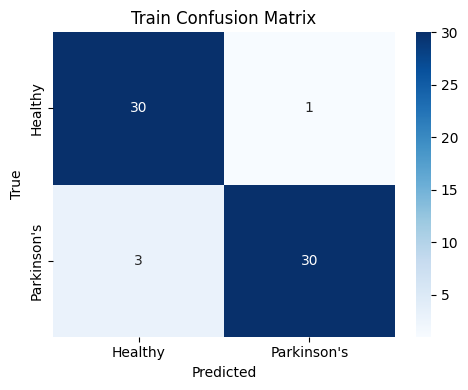

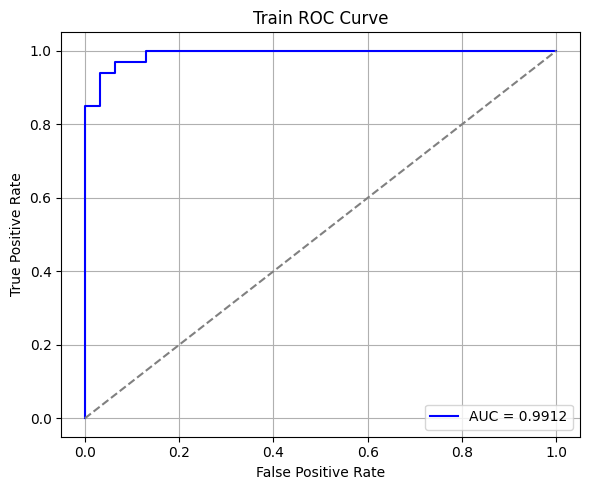


📊 Test Set Metrics:
✅ Accuracy     : 0.8824
✅ AUC Score    : 0.9286

📌 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.90      0.90        10
 Parkinson's       0.86      0.86      0.86         7

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



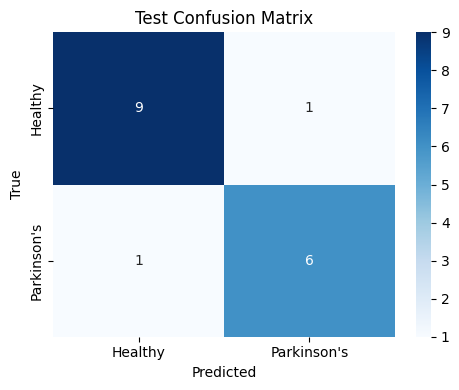

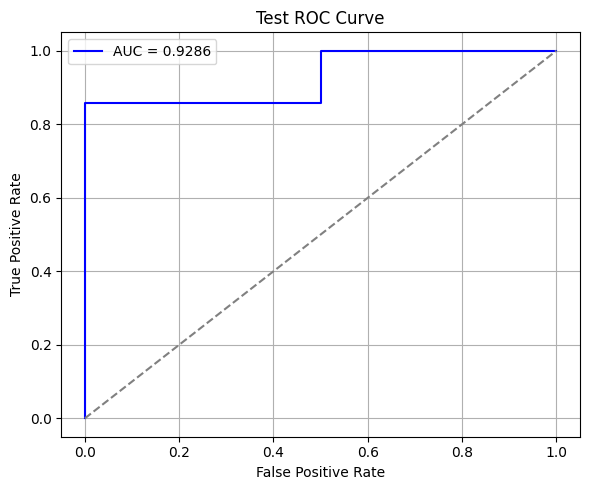

In [ ]:
train_metrics = evaluate_model_full(model, train_loader, device, dataset_name="Train")
test_metrics = evaluate_model_full(model, test_loader, device, dataset_name="Test")

using raw mel spectograms

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=22050)  # Load audio
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)  # linear mel spectrogram

    plt.figure(figsize=(5, 5))
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis=None, y_axis=None)
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

HC_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/HC_AH/HC_AH"
PD_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/PD_AH"
SPECTROGRAM_PATH = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/raw_spectrograms"

HC_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "HC")
PD_SPECTROGRAM_PATH = os.path.join(SPECTROGRAM_PATH, "PD")

# Ensure spectrogram output directories exist
os.makedirs(HC_SPECTROGRAM_PATH, exist_ok=True)
os.makedirs(PD_SPECTROGRAM_PATH, exist_ok=True)

# Process Healthy Control (HC_AH) files
for filename in os.listdir(HC_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(HC_PATH, filename),
                         os.path.join(HC_SPECTROGRAM_PATH, output_filename))

# Process Parkinson’s Disease (PD_AH) files
for filename in os.listdir(PD_PATH):
    if filename.endswith(".wav"):
        output_filename = os.path.splitext(filename)[0] + ".png"  # Remove .wav extension
        save_spectrogram(os.path.join(PD_PATH, filename),
                         os.path.join(PD_SPECTROGRAM_PATH, output_filename))

print("Raw mel Spectrograms saved successfully!")

Raw mel Spectrograms saved successfully!


In [ ]:
import os
import shutil
import random

# Paths to original spectrogram folders
HC_SRC = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/raw_spectrograms/HC"
PD_SRC = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/raw_spectrograms/PD"

# Output directories
BASE_DIR = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/raw_spectrograms"
raw_mel_train_dir = os.path.join(BASE_DIR, "train")
raw_mel_test_dir = os.path.join(BASE_DIR, "test")

# Create folder structure
for cls in ["HC", "PD"]:
    os.makedirs(os.path.join(TRAIN_DIR, cls), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, cls), exist_ok=True)

# Function to split files
def split_and_copy(src_dir, cls_name, train_ratio=0.8):
    files = [f for f in os.listdir(src_dir) if f.endswith(".png")]
    random.shuffle(files)

    split_idx = int(len(files) * train_ratio)
    train_files = files[:split_idx]
    test_files = files[split_idx:]

    for f in train_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(TRAIN_DIR, cls_name, f))
    for f in test_files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(TEST_DIR, cls_name, f))

# Split both classes
split_and_copy(HC_SRC, "HC")
split_and_copy(PD_SRC, "PD")

print("✅ Train-test split done and saved!")


✅ Train-test split done and saved!


In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Since spectrograms are grayscale-ish
])


In [ ]:
train_dataset = datasets.ImageFolder(raw_mel_train_dir, transform=image_transforms)
test_dataset = datasets.ImageFolder(raw_mel_test_dir, transform=image_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pretrained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Modify classifier for binary classification
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 85.2MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {epoch_acc:.2f}%")


Epoch [1/10], Loss: 2.0749, Accuracy: 46.15%
Epoch [2/10], Loss: 1.7481, Accuracy: 75.64%
Epoch [3/10], Loss: 1.4907, Accuracy: 85.90%
Epoch [4/10], Loss: 1.4024, Accuracy: 87.18%
Epoch [5/10], Loss: 1.1728, Accuracy: 91.03%
Epoch [6/10], Loss: 1.0502, Accuracy: 94.87%
Epoch [7/10], Loss: 0.9151, Accuracy: 94.87%
Epoch [8/10], Loss: 0.7339, Accuracy: 97.44%
Epoch [9/10], Loss: 0.6430, Accuracy: 97.44%
Epoch [10/10], Loss: 0.6210, Accuracy: 97.44%


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, dataloader, device, class_names, split_name="Test"):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probs = F.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy()[:, 1])  # probability of class 1

    # Accuracy
    acc = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"{split_name} Accuracy: {acc*100:.2f}%")

    # Classification Report
    print(f"{split_name} Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{split_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{split_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print(f"{split_name} AUC Score: {roc_auc:.4f}")


Train Accuracy: 67.95%
Train Classification Report:
              precision    recall  f1-score   support

     Healthy       0.65      0.80      0.72        40
 Parkinson's       0.72      0.55      0.63        38

    accuracy                           0.68        78
   macro avg       0.69      0.68      0.67        78
weighted avg       0.69      0.68      0.67        78



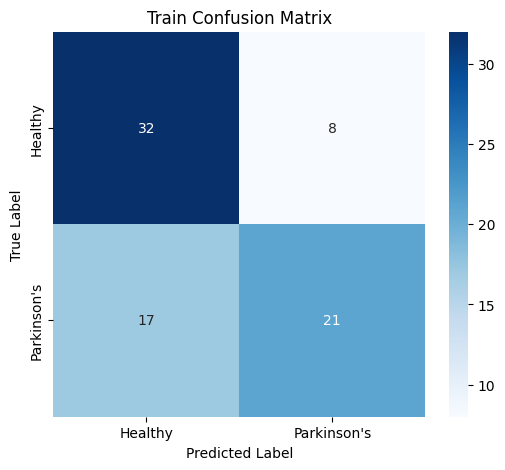

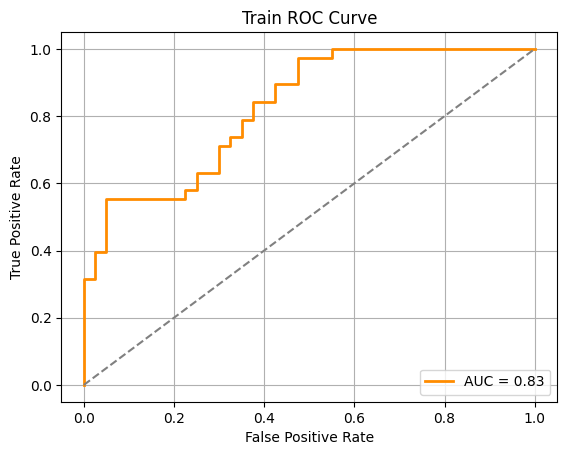

Train AUC Score: 0.8263
Test Accuracy: 70.97%
Test Classification Report:
              precision    recall  f1-score   support

     Healthy       0.68      0.88      0.77        17
 Parkinson's       0.78      0.50      0.61        14

    accuracy                           0.71        31
   macro avg       0.73      0.69      0.69        31
weighted avg       0.73      0.71      0.70        31



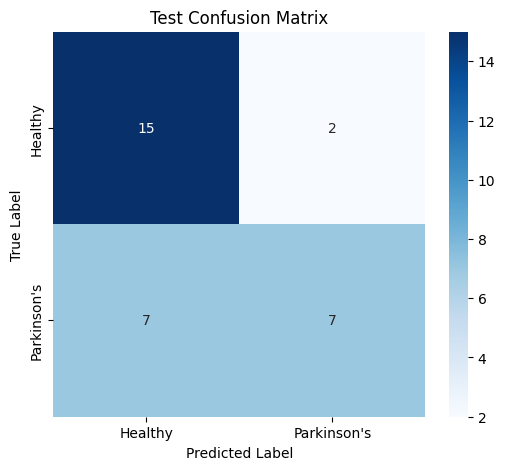

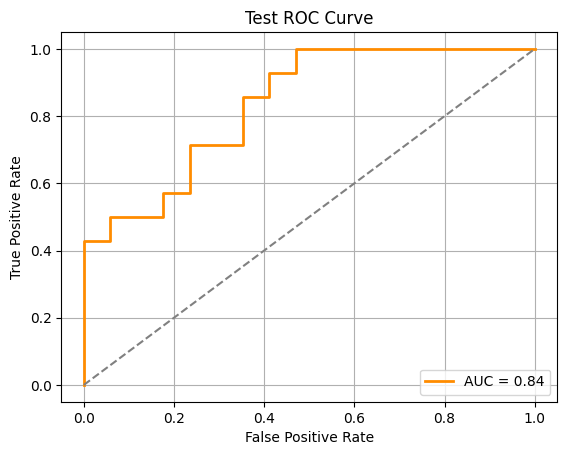

Test AUC Score: 0.8361


In [ ]:
class_names = ["Healthy", "Parkinson's"]

# For Train Set
evaluate_model(model, train_loader, device, class_names, split_name="Train")

# For Test Set
evaluate_model(model, test_loader, device, class_names, split_name="Test")


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Save model state dict
save_path = "/content/drive/MyDrive/specto_savedmodels/efficientnet_logmel_model.pth"
torch.save(model.state_dict(), save_path)

print("✅ Model saved to Google Drive!")


✅ Model saved to Google Drive!


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load EfficientNet-B0 architecture
model = models.efficientnet_b0(pretrained=False)  # No need for pretrained weights now
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # 2 classes (PD vs HC)

# Load saved weights
load_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/saved_models/efficientnet_model.pth"
model.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))

# Move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()  # Set to evaluation mode

print("✅ Model loaded and ready for evaluation!")


inception v3

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import models
from sklearn.metrics import accuracy_score

# Paths
data_dir = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/spectrograms"

transform = transforms.Compose([
    transforms.Resize((299, 299)),      # InceptionV3 expects 299x299
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize all 3 channels
])

# Load Dataset
dataset = ImageFolder(root=data_dir, transform=transform)

In [ ]:
# Train-Test Split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

# Balance Classes using WeightedRandomSampler
labels = np.array([label for _, label in train_dataset])
class_counts = np.bincount(labels)
class_weights = 1.0 / class_counts
sample_weights = class_weights[labels]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained InceptionV3
model = models.inception_v3(pretrained=True, aux_logits=True)
in_features = model.fc.in_features

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 112MB/s]


In [ ]:
# Replace the final classifier
num_classes = 2
model.fc = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(in_features, num_classes)
)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10



/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # InceptionV3 returns (main_output, aux_output) if aux_logits=True
        outputs, aux_outputs = model(images)

        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux_outputs, labels)
        loss = loss1 + 0.4 * loss2  # Combine losses

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch [1/10], Loss: 6.6396, Accuracy: 64.06%
Epoch [2/10], Loss: 3.1121, Accuracy: 79.69%
Epoch [3/10], Loss: 1.5234, Accuracy: 89.06%
Epoch [4/10], Loss: 1.4407, Accuracy: 85.94%
Epoch [5/10], Loss: 0.2492, Accuracy: 96.88%
Epoch [6/10], Loss: 0.6314, Accuracy: 90.62%
Epoch [7/10], Loss: 1.1699, Accuracy: 92.19%
Epoch [8/10], Loss: 0.8904, Accuracy: 92.19%
Epoch [9/10], Loss: 0.7989, Accuracy: 89.06%
Epoch [10/10], Loss: 0.2647, Accuracy: 98.44%


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

def evaluate_model_full(model, data_loader, device, dataset_name="Test", plot_roc=True, plot_cm=True):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):  # Handle InceptionV3's dual output
              outputs = outputs[0]
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Class 1: Parkinson's
            preds = torch.argmax(outputs, dim=1)

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    y_true = np.array(all_labels)
    y_pred = np.array(all_preds)
    y_prob = np.array(all_probs)

    # 🔹 Accuracy & AUC
    accuracy = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_prob)

    # 🔹 Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=["Healthy", "Parkinson's"])

    # 🔹 ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    print(f"\n📊 {dataset_name} Set Metrics:")
    print(f"✅ Accuracy     : {accuracy:.4f}")
    print(f"✅ AUC Score    : {auc_score:.4f}")
    print(f"\n📌 Classification Report:\n{cr}")

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
        plt.title(f"{dataset_name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

    if plot_roc:
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f"{dataset_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        "accuracy": accuracy,
        "auc": auc_score,
        "confusion_matrix": cm,
        "classification_report": cr
    }


📊 Train Set Metrics:
✅ Accuracy     : 0.7812
✅ AUC Score    : 0.9438

📌 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.71      1.00      0.83        35
 Parkinson's       1.00      0.52      0.68        29

    accuracy                           0.78        64
   macro avg       0.86      0.76      0.76        64
weighted avg       0.84      0.78      0.76        64



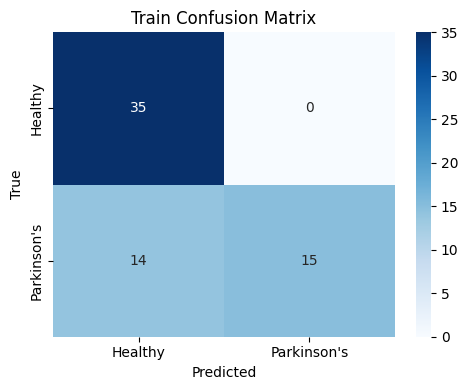

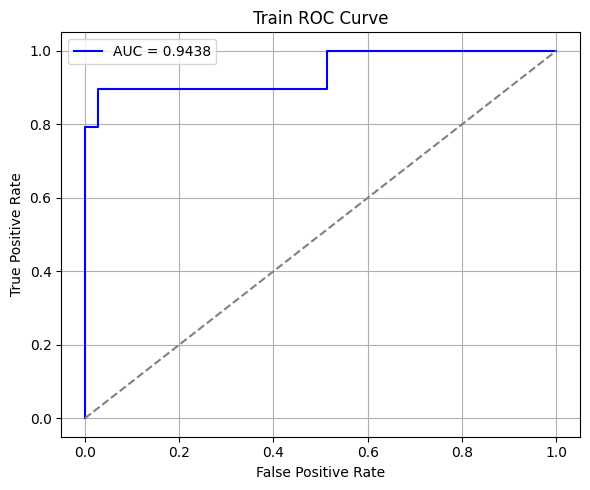


📊 Test Set Metrics:
✅ Accuracy     : 0.7059
✅ AUC Score    : 0.6143

📌 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.67      1.00      0.80        10
 Parkinson's       1.00      0.29      0.44         7

    accuracy                           0.71        17
   macro avg       0.83      0.64      0.62        17
weighted avg       0.80      0.71      0.65        17



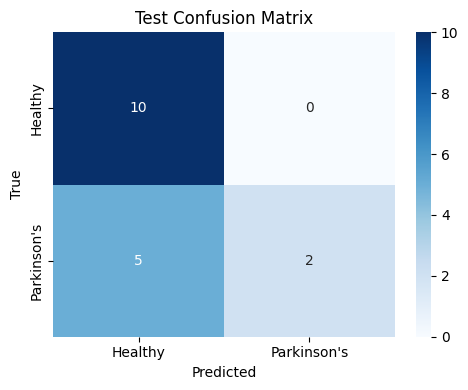

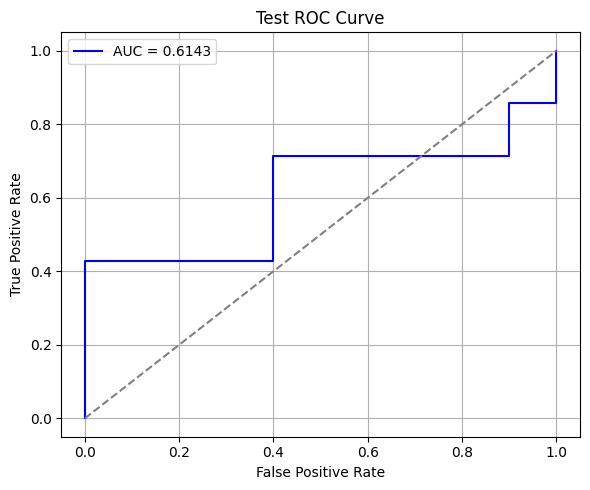

In [ ]:
train_metrics = evaluate_model_full(model, train_loader, device, dataset_name="Train")
test_metrics = evaluate_model_full(model, test_loader, device, dataset_name="Test")

In [ ]:
# Save model state dict
save_path = "/content/drive/MyDrive/specto_savedmodels/incepv3_logmel_model.pth"
torch.save(model.state_dict(), save_path)

print("✅ Model saved to Google Drive!")

✅ Model saved to Google Drive!


Attention+Auto Encoder on numerical

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")

# Assuming the last column is the target (HC vs PD)
X = df.iloc[:,1 :-1]  # Features
y = df.iloc[:, -1]   # Target labels (HC=0, PD=1)
y = df["label"].map({"HC": 0, "PD": 1})

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 🔹 Define the Attention-Based Autoencoder with Dropout
class AttentionAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim, num_heads=4):
        super(AttentionAutoencoder, self).__init__()

        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, batch_first=True)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),  # 🔹 Dropout added
            nn.Linear(128, latent_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),  # 🔹 Dropout added
            nn.Linear(128, input_dim)
        )

        self.classifier = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),  # 🔹 Dropout added
            nn.Linear(64, 2)
        )

    def forward(self, x):
        x = x.unsqueeze(0)  # For attention
        x, _ = self.attention(x, x, x)
        x = x.squeeze(0)
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        classification_output = self.classifier(latent)
        return reconstruction, classification_output, latent

# 🔹 Hyperparameters
input_dim = 23
latent_dim = 16
lr = 0.001
epochs = 100
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Model, Loss, Optimizer with weight decay
# Use num_heads = 1 to avoid divisible issue
model = AttentionAutoencoder(input_dim, latent_dim, num_heads=1).to(device)

criterion_reconstruction = nn.MSELoss()
criterion_classification = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)

In [ ]:
def train(model, train_loader, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            reconstruction, classification_output, _ = model(features)
            loss_reconstruction = criterion_reconstruction(reconstruction, features)
            loss_classification = criterion_classification(classification_output, labels)
            loss = loss_reconstruction + loss_classification
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

In [ ]:
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
X_train_tensor = torch.FloatTensor(X_train_split)
y_train_tensor = torch.LongTensor(y_train_split.values)
X_test_tensor = torch.FloatTensor(X_test_split)
y_test_tensor = torch.LongTensor(y_test_split.values)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now call the train function
train(model, train_loader, epochs)

Epoch 1/100, Loss: 3.3537
Epoch 2/100, Loss: 3.4057
Epoch 3/100, Loss: 3.3740
Epoch 4/100, Loss: 3.4684
Epoch 5/100, Loss: 3.3735
Epoch 6/100, Loss: 3.2819
Epoch 7/100, Loss: 3.4353
Epoch 8/100, Loss: 3.2386
Epoch 9/100, Loss: 3.2443
Epoch 10/100, Loss: 3.3672
Epoch 11/100, Loss: 3.3533
Epoch 12/100, Loss: 3.1999
Epoch 13/100, Loss: 3.2051
Epoch 14/100, Loss: 3.2391
Epoch 15/100, Loss: 3.1226
Epoch 16/100, Loss: 3.0914
Epoch 17/100, Loss: 3.0991
Epoch 18/100, Loss: 3.0053
Epoch 19/100, Loss: 2.9436
Epoch 20/100, Loss: 3.0235
Epoch 21/100, Loss: 2.8579
Epoch 22/100, Loss: 2.8862
Epoch 23/100, Loss: 2.9221
Epoch 24/100, Loss: 2.9049
Epoch 25/100, Loss: 2.9647
Epoch 26/100, Loss: 2.7460
Epoch 27/100, Loss: 2.8075
Epoch 28/100, Loss: 2.9050
Epoch 29/100, Loss: 2.9099
Epoch 30/100, Loss: 2.8931
Epoch 31/100, Loss: 2.8621
Epoch 32/100, Loss: 2.8042
Epoch 33/100, Loss: 2.9152
Epoch 34/100, Loss: 2.9382
Epoch 35/100, Loss: 2.7752
Epoch 36/100, Loss: 2.7843
Epoch 37/100, Loss: 2.7056
Epoch 38/1

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import torch.nn.functional as F

def get_predictions(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    with torch.no_grad():
        for features, labels in data_loader:
            features = features.to(device)
            labels = labels.to(device)
            _, outputs, _ = model(features)
            probs = F.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())  # Prob of class 1 (Parkinson's)
    return all_preds, all_labels, all_probs


In [ ]:
y_train_pred, y_train_true, y_train_prob = get_predictions(model, train_loader)
y_test_pred, y_test_true, y_test_prob = get_predictions(model, test_loader)

# Evaluation Metrics
accuracy_train = accuracy_score(y_train_true, y_train_pred)
accuracy_test = accuracy_score(y_test_true, y_test_pred)

print(f"✅ Training Accuracy: {accuracy_train:.2%}")
print(f"✅ Testing Accuracy: {accuracy_test:.2%}")

print("\n🔹 Classification Report:\n", classification_report(y_test_true, y_test_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test_true, y_test_pred))

# AUC Scores
auc_train = roc_auc_score(y_train_true, y_train_prob)
auc_test = roc_auc_score(y_test_true, y_test_prob)

print(f"🔹 Train AUC Score: {auc_train:.2f}")
print(f"🔹 Test AUC Score: {auc_test:.2f}")

✅ Training Accuracy: 72.55%
✅ Testing Accuracy: 84.62%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.75      1.00      0.86         6

    accuracy                           0.85        13
   macro avg       0.88      0.86      0.85        13
weighted avg       0.88      0.85      0.84        13


🔹 Confusion Matrix:
 [[5 2]
 [0 6]]
🔹 Train AUC Score: 0.85
🔹 Test AUC Score: 0.81


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv")

# Assuming the last column is the target (HC vs PD)
X = df.iloc[:,1 :-1]  # Features
y = df.iloc[:, -1]   # Target labels (HC=0, PD=1)
y = df["label"].map({"HC": 0, "PD": 1})

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#  Define the Attention-Based Autoencoder
class AttentionAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim, num_heads=4):
        super(AttentionAutoencoder, self).__init__()

        # Encoder with Attention
        self.attention = nn.MultiheadAttention(embed_dim=23, num_heads=1, batch_first=True)
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)  # Compress to latent space
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)  # Reconstruct original input
        )

        # Classifier (uses latent space)
        self.classifier = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Binary classification: Healthy (0) vs. Parkinson’s (1)
        )

    def forward(self, x):
        # 🔹 Reshape for Multihead Attention: (batch_size, input_dim) -> (1, batch_size, input_dim)
        x = x.unsqueeze(0)

        # 🔹 Apply self-attention
        x, _ = self.attention(x, x, x)

        # 🔹 Remove sequence dimension: (1, batch_size, input_dim) -> (batch_size, input_dim)
        x = x.squeeze(0)

        # 🔹 Encode
        latent = self.encoder(x)

        # 🔹 Decode (Reconstruction Loss)
        reconstruction = self.decoder(latent)

        # 🔹 Classification (No Softmax; CrossEntropyLoss applies it)
        classification_output = self.classifier(latent)

        return reconstruction, classification_output, latent

# 🔹 Hyperparameters
input_dim = 23  # Number of speech features
latent_dim = 16  # Compressed feature size
num_heads = 4  # Attention heads
lr = 0.001
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Model, Loss, Optimizer
model = AttentionAutoencoder(input_dim, latent_dim, num_heads).to(device)
criterion_reconstruction = nn.MSELoss()  # For Autoencoder
criterion_classification = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
def train(model, train_loader, epochs):
    model.train()
    for epoch in range(epochs):
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            reconstruction, classification_output, latent = model(features)

            # Compute losses
            loss_reconstruction = criterion_reconstruction(reconstruction, features)
            loss_classification = criterion_classification(classification_output, labels)
            loss = loss_reconstruction + loss_classification

            # Backpropagation
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [ ]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
X_train_tensor = torch.FloatTensor(X_train_split)
y_train_tensor = torch.LongTensor(y_train_split.values)
X_test_tensor = torch.FloatTensor(X_test_split)
y_test_tensor = torch.LongTensor(y_test_split.values)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now call the train function
train(model, train_loader, epochs)

Epoch 1/100, Loss: 0.8125
Epoch 2/100, Loss: 0.8169
Epoch 3/100, Loss: 0.9906
Epoch 4/100, Loss: 1.1200
Epoch 5/100, Loss: 0.7470
Epoch 6/100, Loss: 0.7263
Epoch 7/100, Loss: 0.8304
Epoch 8/100, Loss: 0.6827
Epoch 9/100, Loss: 0.7222
Epoch 10/100, Loss: 0.7267
Epoch 11/100, Loss: 0.7387
Epoch 12/100, Loss: 0.8231
Epoch 13/100, Loss: 0.6513
Epoch 14/100, Loss: 0.6723
Epoch 15/100, Loss: 0.9122
Epoch 16/100, Loss: 0.6606
Epoch 17/100, Loss: 0.6593
Epoch 18/100, Loss: 0.5954
Epoch 19/100, Loss: 0.6453
Epoch 20/100, Loss: 0.8091
Epoch 21/100, Loss: 0.6288
Epoch 22/100, Loss: 0.7032
Epoch 23/100, Loss: 0.5994
Epoch 24/100, Loss: 0.7016
Epoch 25/100, Loss: 0.7128
Epoch 26/100, Loss: 0.6843
Epoch 27/100, Loss: 0.8345
Epoch 28/100, Loss: 0.7226
Epoch 29/100, Loss: 0.8193
Epoch 30/100, Loss: 0.6524
Epoch 31/100, Loss: 0.5433
Epoch 32/100, Loss: 0.5634
Epoch 33/100, Loss: 0.7263
Epoch 34/100, Loss: 0.8610
Epoch 35/100, Loss: 0.7484
Epoch 36/100, Loss: 0.8842
Epoch 37/100, Loss: 0.6404
Epoch 38/1

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            _, classification_output, _ = model(features)
            predictions = torch.argmax(classification_output, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    return correct / total

val_accuracy = evaluate(model, test_loader)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 0.6154


In [ ]:
print(model)


AttentionAutoencoder(
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=24, out_features=24, bias=True)
  )
  (encoder): Sequential(
    (0): Linear(in_features=24, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=24, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6471

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.60      0.75      0.67         8

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65        17
weighted avg       0.66      0.65      0.64        17


Confusion Matrix:
 [[5 4]
 [2 6]]


Multilayer Perceptron (MLP)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1️⃣ Load Selected Features Dataset
file_path = "/content/drive/MyDrive/NeuroSpeechBert_Dataset/selected_features.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=["label"])  # Features (remove label column)
y = df["label"].map({"HC": 0, "PD": 1})
X = df.iloc[:, 1:-1]  # Convert labels to 0 (HC) and 1 (PD)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for PyTorch
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch DataLoaders
batch_size = min(16, len(X_train))  # Ensure batch size is not larger than dataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ParkinsonClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ParkinsonClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Two classes: Healthy (0), Parkinson's (1)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
input_dim = X_train.shape[1]  # Number of features
model = ParkinsonClassifier(input_dim)

# Loss function & optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for classification
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert Data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Labels should be Long for CrossEntropyLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)


In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # Classification loss

    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/50], Loss: 0.6970
Epoch [2/50], Loss: 0.6900
Epoch [3/50], Loss: 0.6833
Epoch [4/50], Loss: 0.6769
Epoch [5/50], Loss: 0.6707
Epoch [6/50], Loss: 0.6647
Epoch [7/50], Loss: 0.6588
Epoch [8/50], Loss: 0.6532
Epoch [9/50], Loss: 0.6476
Epoch [10/50], Loss: 0.6420
Epoch [11/50], Loss: 0.6365
Epoch [12/50], Loss: 0.6312
Epoch [13/50], Loss: 0.6259
Epoch [14/50], Loss: 0.6207
Epoch [15/50], Loss: 0.6155
Epoch [16/50], Loss: 0.6103
Epoch [17/50], Loss: 0.6052
Epoch [18/50], Loss: 0.6001
Epoch [19/50], Loss: 0.5950
Epoch [20/50], Loss: 0.5899
Epoch [21/50], Loss: 0.5848
Epoch [22/50], Loss: 0.5797
Epoch [23/50], Loss: 0.5745
Epoch [24/50], Loss: 0.5692
Epoch [25/50], Loss: 0.5639
Epoch [26/50], Loss: 0.5586
Epoch [27/50], Loss: 0.5533
Epoch [28/50], Loss: 0.5479
Epoch [29/50], Loss: 0.5426
Epoch [30/50], Loss: 0.5372
Epoch [31/50], Loss: 0.5317
Epoch [32/50], Loss: 0.5263
Epoch [33/50], Loss: 0.5208
Epoch [34/50], Loss: 0.5153
Epoch [35/50], Loss: 0.5097
Epoch [36/50], Loss: 0.5040
E

In [ ]:
# Testing
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs, y_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get predicted class (0 or 1)

    # Compute Accuracy
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = (correct / total) * 100

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

Test Loss: 0.5988
Test Accuracy: 70.59%


✅ Accuracy: 70.59%
✅ Precision: 80.00%
✅ Recall: 72.73%
✅ F1 Score: 76.19%
✅ AUC-ROC Score: 0.74


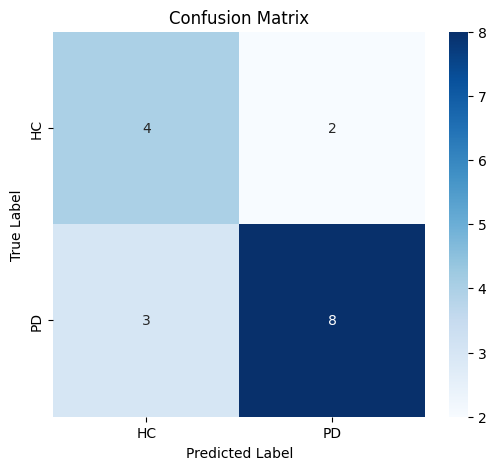

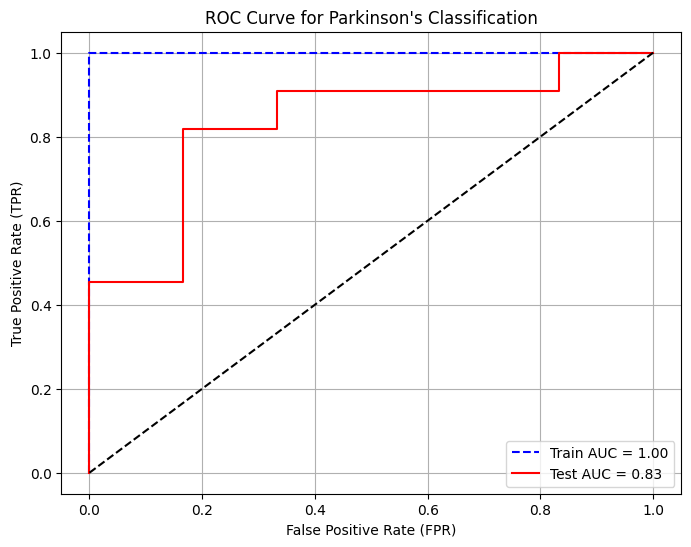

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Move model to eval mode
model.eval()

# Get predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get class predictions (0 or 1)
    probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get probability for class 1 (PD)

# Convert to NumPy
y_test_np = y_test_tensor.cpu().numpy()
y_pred_np = predicted.cpu().numpy()
y_prob_np = probabilities.cpu().numpy()

# 🔹 Compute Evaluation Metrics
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)
auc_score = roc_auc_score(y_test_np, y_prob_np)

print(f"✅ Accuracy: {accuracy:.2%}")
print(f"✅ Precision: {precision:.2%}")
print(f"✅ Recall: {recall:.2%}")
print(f"✅ F1 Score: {f1:.2%}")
print(f"✅ AUC-ROC Score: {auc_score:.2f}")

# 🔹 Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_np)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🔹 ROC Curve
fpr, tpr, _ = roc_curve(y_test_np, y_prob_np)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.2f}", linestyle="--", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.2f}", linestyle="-", color="red")
plt.plot([0, 1], [0, 1], linestyle="dashed", color="black")  # Random guess line

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Parkinson's Classification")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def compute_accuracy(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == y_tensor).sum().item()
        total = y_tensor.size(0)
        accuracy = (correct / total) * 100
    return accuracy


train_accuracy = compute_accuracy(model, X_train_tensor, y_train_tensor)
test_accuracy = compute_accuracy(model, X_test_tensor, y_test_tensor)

print(f"✅ Training Accuracy: {train_accuracy:.2f}%")
print(f"✅ Testing Accuracy: {test_accuracy:.2f}%")


✅ Training Accuracy: 85.71%
✅ Testing Accuracy: 70.59%
